## REVIEW: INTERPOLATION
### Why do we interpolate data?
- When we desire data where data does not currently exist

### What are some example applications of interpolation?
- Filling in missing data
- Getting irregular (unstructured) data onto a grid
- Changing resolution of data

### How does interpolation accomplish this?
- Finds function that goes through existing data points
- Examples: linear, cubic spline, nearest neighbor (and 2D versions!) 

### We can do 1D interpolation or 2D+ interpolation (spatial) 

In [8]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np

# scipy.interpolate - specific functions to import
from scipy.interpolate import interp1d
from scipy.interpolate import interp2d

## INTERPOLATION IN PYTHON:
### Much interpolation in Python is done using interpolation functions in scipy, either directly or indirectly: https://docs.scipy.org/doc/scipy/reference/tutorial/interpolate.html
- Interpolation functions in Pandas, Xarray, etc. often tap into scipy functionality under-the-hood!
- This is the case for many, many analyses, plottings, etc - remember?

## INTERPOLATION IN PTYHON: 1D
**interp1d** (directly in scipy)
- *takes*: x data, y data, and type of interpolation ('kind')
<br><br>
- *returns*: function!
  - pass new array of x-values to this function and get your interpolated y values!

In [9]:
# Original data
x = np.linspace(1, 12, 12)
y = np.cos(-x**2/9.0)
print(x)

[ 1.  2.  3.  4.  5.  6.  7.  8.  9. 10. 11. 12.]


In [10]:
# Linear interpolation
f = interp1d(x, y,kind='linear')
print(f)

In [11]:
# Cubic spline interpolation
f2 = interp1d(x, y, kind='cubic')

In [12]:
# New array of x-values - want function every x = 0.25 
xnew = np.linspace(1, 12, 45)
print(xnew)

[ 1.    1.25  1.5   1.75  2.    2.25  2.5   2.75  3.    3.25  3.5   3.75
  4.    4.25  4.5   4.75  5.    5.25  5.5   5.75  6.    6.25  6.5   6.75
  7.    7.25  7.5   7.75  8.    8.25  8.5   8.75  9.    9.25  9.5   9.75
 10.   10.25 10.5  10.75 11.   11.25 11.5  11.75 12.  ]


Text(0.5, 1.0, 'Types of 1D Interpolation')

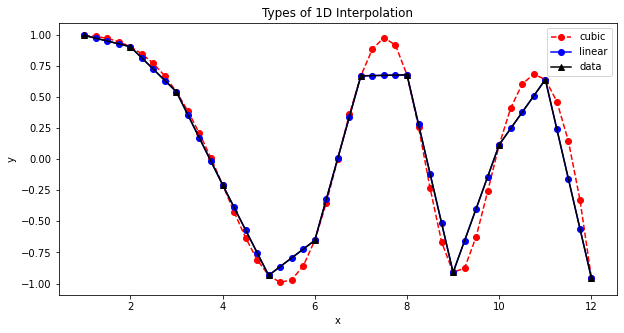

In [13]:
fig,ax=plt.subplots(figsize=(10,5))
ax.plot(xnew, f2(xnew), '--or', xnew, f(xnew), '-ob',x,y,'-^k')
ax.legend(['cubic', 'linear', 'data'], loc='best')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_title('Types of 1D Interpolation')

**interpolating in Pandas, esp. to fill in NaNs - df.interpolate  (https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.interpolate.html)**
- calls *interp1d* under the hood
<br><br>
- interpolates using the numerical values of the indices (except for 'linear' method which ignores indices and assumes data are regularly spaced)
<br><br>
- can specify: 
  - method of interpolation (*method*)
     - for certain methods, also need *order* (e.g., polynomial)
  - maximum number of consecutive NaNs to fill (*limitint*)
  - direction you want to fill consecutive NaNs (*limit_direction*)
  - additional filling of NaN restrictions (*limit_area*)

             y
x             
1.0   0.993834
2.0   0.902850
3.0   0.540302
4.0  -0.205507
5.0  -0.934546
6.0  -0.653644
7.0   0.668400
8.0   0.676405
9.0  -0.911130
10.0  0.115280
11.0  0.638635
12.0 -0.957659


Text(0.5, 1.0, 'Various ways to fill in missing data via interpolation')

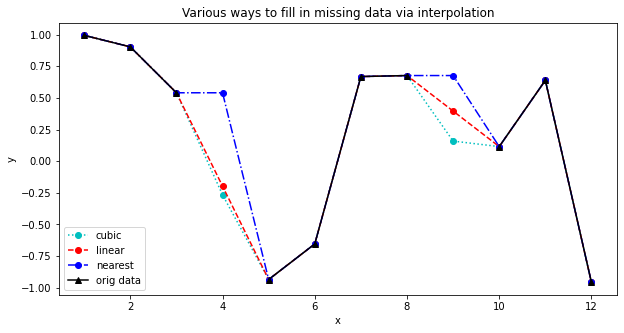

In [14]:
d = {'x':x, 'y':y}
df = pd.DataFrame(data=d)
df.set_index('x',inplace=True)
print(df)

df.at[4] = np.nan
df.at[9] = np.nan

linear = df.interpolate(method='linear')
nearest = df.interpolate(method='nearest')
cubic = df.interpolate(method='cubic')


fig,ax=plt.subplots(figsize=(10,5))
ax.plot(x,cubic,':oc',x,linear,'--or',x,nearest,'-.ob',x,df,'-^k')
ax.legend(['cubic','linear','nearest','orig data'], loc='best')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_title('Various ways to fill in missing data via interpolation')